<a href="https://colab.research.google.com/github/vponkia/LoanApprovalPrediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/vponkia/LoanApprovalPrediction.git

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML/Project/LoanPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print('Number of rows are 614 and columns are 12')
df.shape

Number of rows are 614 and columns are 12


(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Treating Null values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Most frequently occurring value for Gender, Married, Dependents, Self_Employed, Loan_Amount_Term and Credit_History for categorical feature are

In [8]:
#finding all columns
# print("Gender",df["Gender"].mode())
# print("Married",df["Married"].mode())
# print("Dependents",df["Dependents"].mode())
# print("Self_Employed",df["Self_Employed"].mode())
# print("Loan_Term",df["Loan_Amount_Term"].mode())
# print("Credit_History",df["Credit_History"].mode())


In [9]:
#Filling in the missing values with the most common category in the dataset for categorical feature
# df["Gender"].replace(np.nan,"Male",inplace=True)
# df["Married"].replace(np.nan,"Yes",inplace=True)
# df["Self_Employed"].replace(np.nan,"No",inplace=True)
# df["Dependents"].replace(np.nan,0,inplace=True)
# df["Loan_Amount_Term"].replace(np.nan,360.0,inplace=True)
# df["Credit_History"].replace(np.nan,1.0,inplace=True)

In [10]:
# Specify the columns for which you want to calculate the mode
columns = ["Gender", "Married", "Dependents", "Self_Employed", "Loan_Amount_Term", "Credit_History"]

modes = {}  # Dictionary to store the mode values

for column in columns:
    mode_value = df[column].mode()[0]
    modes[column] = mode_value
    df[column].replace(np.nan, mode_value, inplace=True) #replace null values with that columns mode_value

# Print the updated Data
print(modes)
print(df.head())


{'Gender': 'Male', 'Married': 'Yes', 'Dependents': '0', 'Self_Employed': 'No', 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0}
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Ar

Filling in the missing values with mean for numeric value

In [11]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)

In [12]:
print('No more missing values')
df.isnull().sum()

No more missing values


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df = df.drop(['Loan_ID'],axis =1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Eligibility for loan based on gender that is
Males are taking more loan than Females.

<Axes: xlabel='Gender', ylabel='count'>

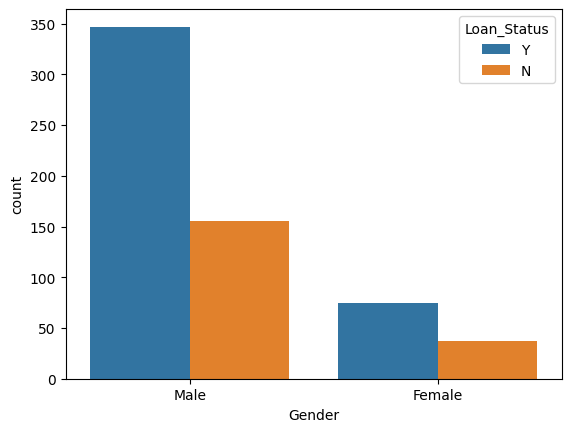

In [15]:
sns.countplot(x ='Gender',hue = 'Loan_Status',data = df)

The person who is graduated are more capable to get loan compared to undergraduated.

<Axes: xlabel='Education', ylabel='count'>

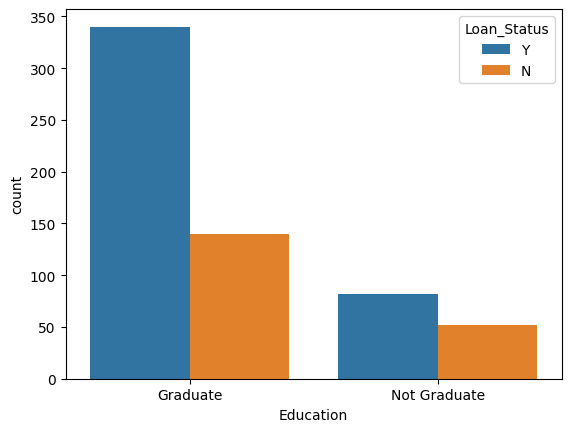

In [16]:
sns.countplot(x ='Education',hue = 'Loan_Status',data = df)

The Married people are taking loan more than unmarried people.

<Axes: xlabel='Married', ylabel='count'>

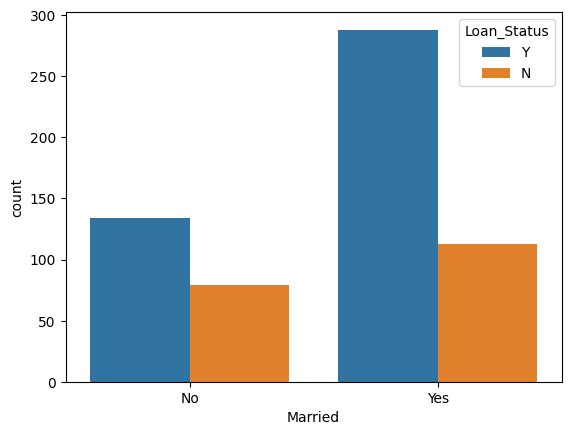

In [17]:
sns.countplot(x ='Married',hue = 'Loan_Status',data = df)

Independent are more likely to get loan then dependents.

<Axes: xlabel='Dependents', ylabel='count'>

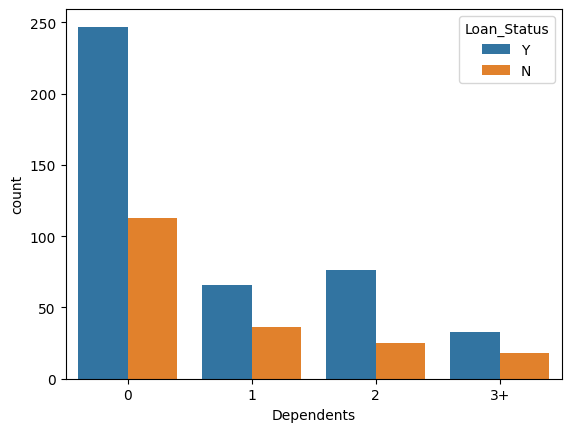

In [18]:
sns.countplot(x ='Dependents',hue = 'Loan_Status',data = df)

The person who have good credit history are capable to get loan

<Axes: xlabel='Credit_History', ylabel='count'>

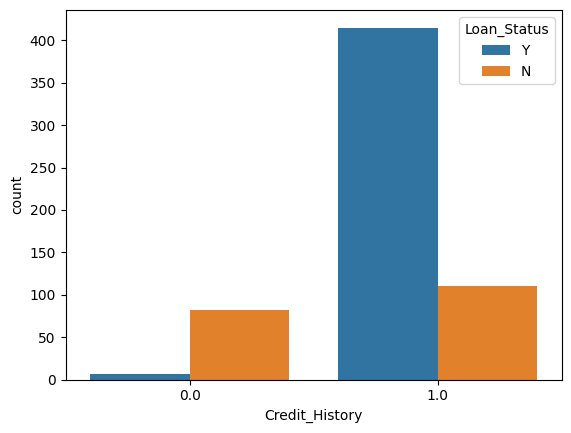

In [19]:
sns.countplot(x ='Credit_History',hue = 'Loan_Status',data = df)

Converting categorical value to numerical value

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Craeating Dummy variable for all categorical columns

In [21]:
# df['Married']=df['Married'].replace({'Yes':1,'No':0}).astype(int)
# df['Self_Employed']=df['Self_Employed'].replace({'Yes':1,'No':0}).astype(int)
# df['Gender']=df['Gender'].replace({'Male':1,'Female':0}).astype(int)
# df['Dependents']=df['Dependents'].replace({'0': 0, '1': 1 ,'2': 2 ,'3+': 3}).astype(int)
# df['Education']=df['Education'].replace({'Graduate': 1, 'Not Graduate': 0}).astype(int)
# df['Property_Area']=df['Property_Area'].replace({'Urban': 0, 'Rural': 1 ,'Semiurban': 2}).astype(int)
# df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0}).astype(int)
# df.head()

In [22]:
# Get a list of categorical column names
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Create dummy variables for all categorical columns

data_dummies = pd.DataFrame()

for column in categorical_columns:
   #IF that columns contains more than 2 unique values than not dropping first generated columns
    if df[column].nunique() > 2:
        dummies = pd.get_dummies(df[column], prefix=column)
    #if it has 2 values then dropping first generated columns because possible values are only 0 and 1, so one columns is inaff
    else:
        dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    data_dummies = pd.concat([data_dummies, dummies], axis=1)

# Check all generated dummy variables
print(data_dummies.columns)

Index(['Gender_Male', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')


In [24]:
#concating dummies columns with original dataset
df = pd.concat([df, data_dummies], axis = 1)

#dropping original categorical columns because now we created dummies columns
df.drop(categorical_columns, axis=1, inplace = True)

# Check the updated dataset
print(df.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')


Credit history is more correlated with target column(Loan_status).

<Axes: >

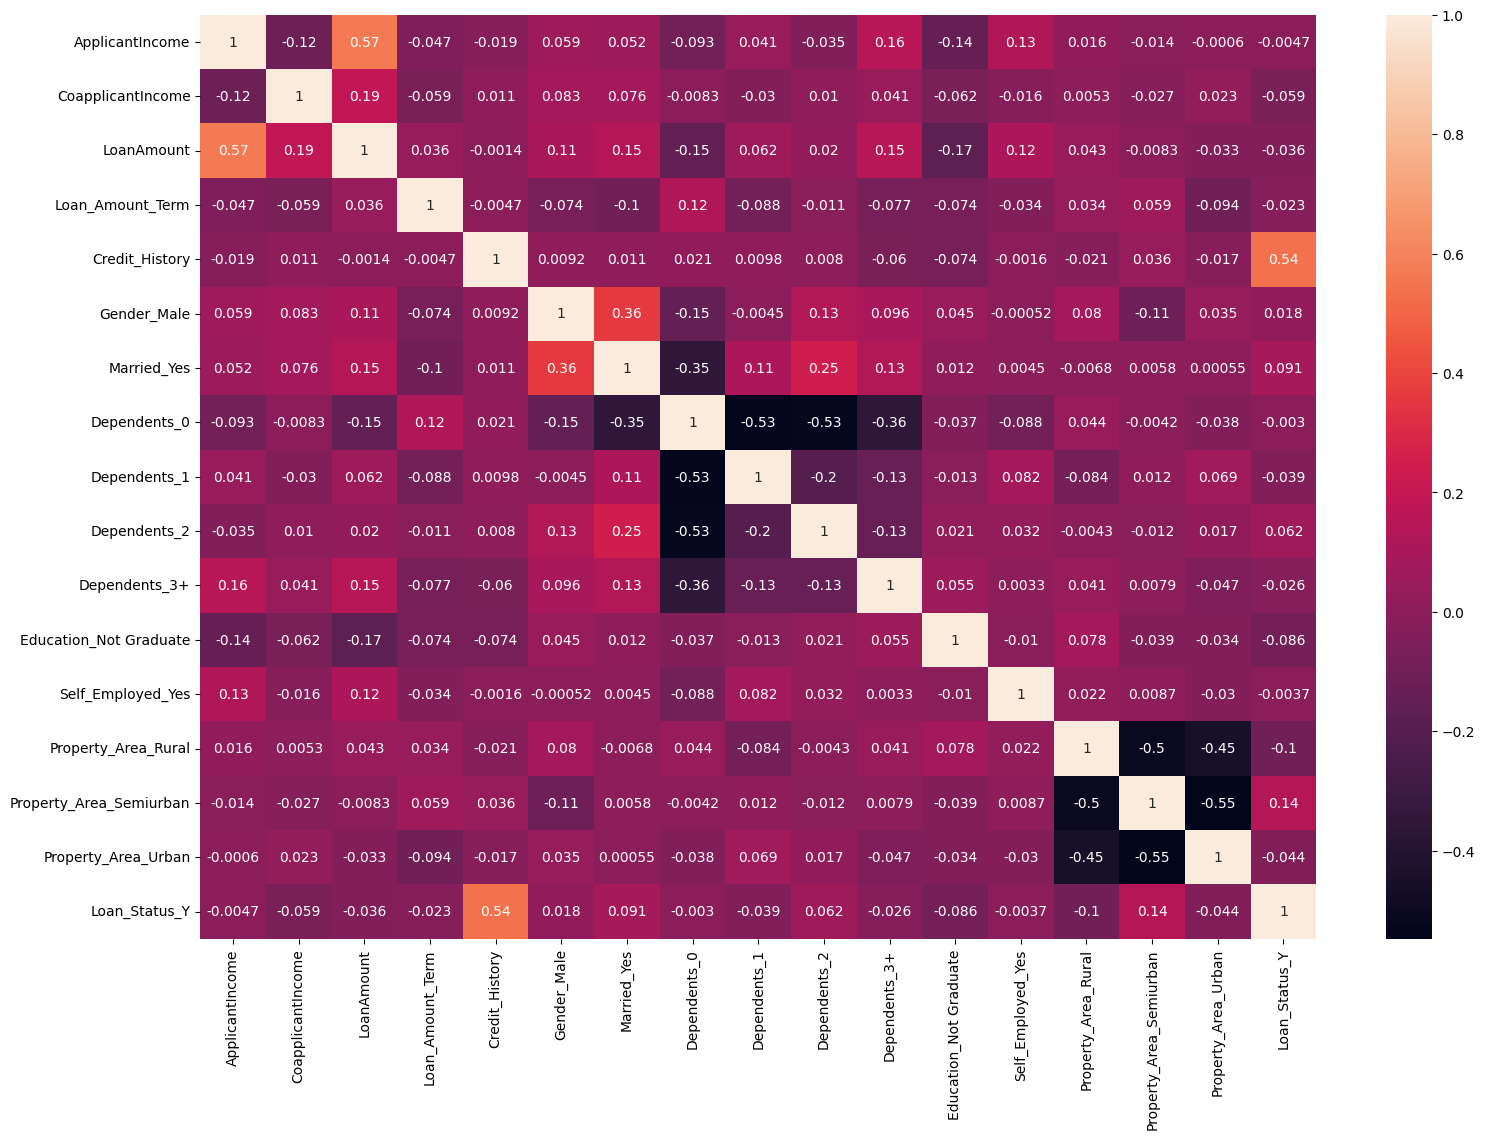

In [25]:
# Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)

Feature and target

In [26]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,1,0,0,0,0,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,1,0,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,0,1,0,0,0,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,0,1,0,0,0,0,0,1


In [28]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

Train-test split

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(491, 16)
(123, 16)
(491,)
(123,)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# models = []
# models.append(('Logistic Regression', LogisticRegression()))
# models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
# models.append(('K Nearest Neighbors', KNeighborsClassifier()))
# models.append(('Decision Tree', DecisionTreeClassifier()))
# models.append(('Gaussian Naive Bayes', GaussianNB()))
# models.append(('Random Forest', RandomForestClassifier()))
# # models.append(('Support Vector', SVC())

In [32]:
# for name,algorithm in models:
#     model= algorithm
#     model.fit(xtrain, ytrain)
#     prediction = model.predict(xtest)
#     print('The accuracy of the %s is %f:'%(name,accuracy_score(prediction,ytest)))
# print('\n')

Standardizing the data

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(xtrain)
X_test_scaled = sc.transform(xtest)

### Logistic Regression

Applying Logistic Regression

In [34]:
model = LogisticRegression()
#LR = model.fit(xtrain, ytrain)
LR = model.fit(X_train_scaled, ytrain)

In [35]:
#y_pred_prob = LR.predict_proba(xtest)
y_pred_prob = LR.predict_proba(X_test_scaled)
#y_pred = LR.predict(X_test)
y_pred= LR.predict(X_test_scaled)

In [36]:
df = pd.DataFrame({"Prob_class_0": y_pred_prob[:,0], "Prob_class_1": y_pred_prob[:,1], "Predicted class": y_pred})
df.head()

,Prob_class_0,Prob_class_1,Predicted class
0,0.141689,0.858311,1
1,0.155357,0.844643,1
2,0.285558,0.714442,1
3,0.203431,0.796569,1
4,0.098603,0.901397,1


In [37]:
Accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 83.74


In [38]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(ytest, y_pred)
conf_mat

array([[15, 18],
       [ 2, 88]])

In [39]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

<Axes: >

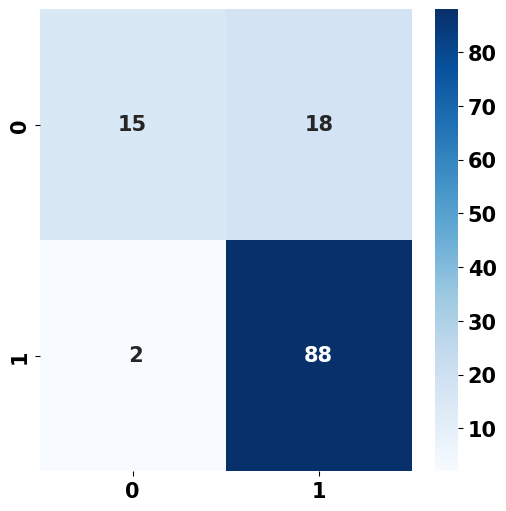

In [40]:
plt.figure(figsize = (6,6))
sns.heatmap(conf_mat, annot = True, fmt ='2g', cmap = 'Blues', annot_kws = {"size":15})

In [41]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(ytest, y_pred, normalize=True)]
,"Precision":[precision_score(ytest, y_pred, average = 'macro')]
,"Recall":[recall_score(ytest, y_pred, average = 'macro')]
,"F1-Score":[f1_score(ytest, y_pred, average = 'macro')]})

Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.837398,0.856271,0.716162,0.74898


### KNN

Applying KNN Classifier

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train_scaled, ytrain)
y_pred = knn.predict(X_test_scaled)

In [44]:
Accuracy = np.mean(y_pred == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 74.80


In [45]:
Error_Rate = []

for i in range(1,30):

    knn_opt = KNeighborsClassifier(n_neighbors = i)
    knn_opt.fit(X_train_scaled,ytrain)
    y_pred_opt = knn_opt.predict(X_test_scaled)
    Accuracy = np.mean(y_pred_opt == ytest)
    error_rate_value = 1 - Accuracy
    Error_Rate.append(error_rate_value)


Text(0, 0.5, 'Error Rate')

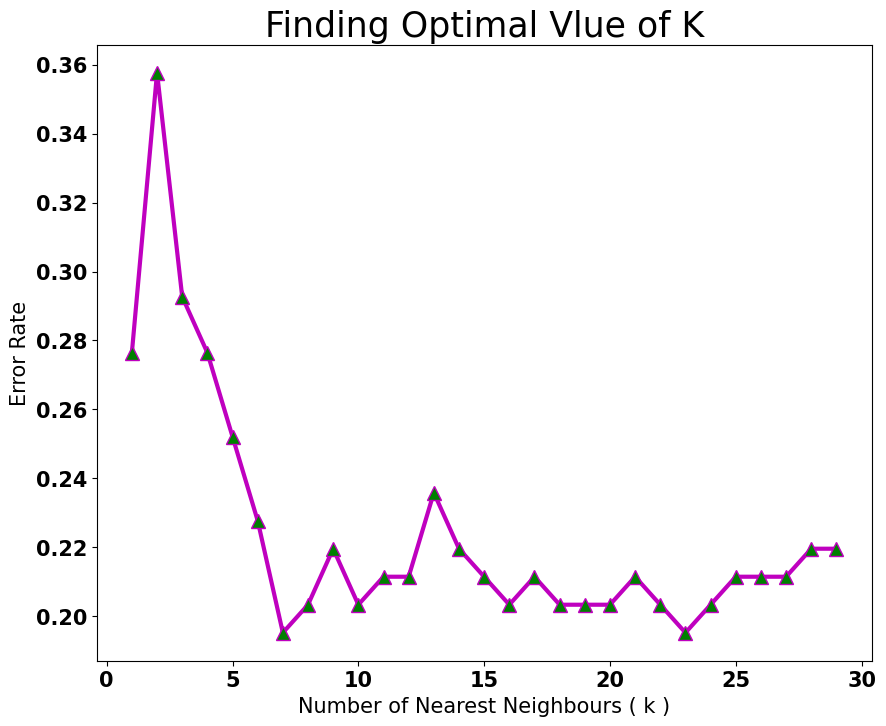

In [46]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 30), Error_Rate, 'm', lw = 3,  marker ='^', markerfacecolor ='g', markersize = 10)
plt.title('Finding Optimal Vlue of K', fontsize = 25)
plt.xlabel('Number of Nearest Neighbours ( k )', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

In [77]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)

In [78]:
knn_7.fit(X_train_scaled, ytrain)
y_pred_7 = knn_7.predict(X_test_scaled)

In [79]:
Accuracy = np.mean(y_pred_7 == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 80.49


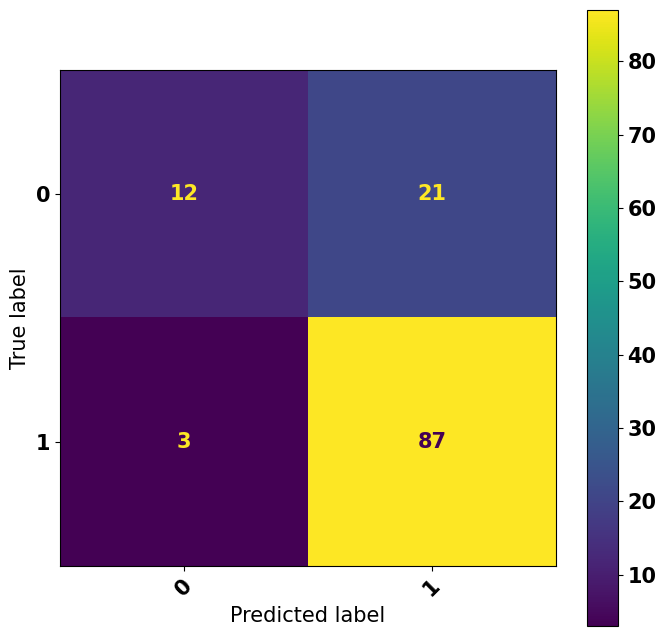

In [80]:
#Confusion Metrix
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

cm = confusion_matrix(ytest, y_pred_7)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

### Random forest

In [94]:
rf = RandomForestClassifier(n_estimators=10,max_features='sqrt', bootstrap = True, oob_score = True, random_state=101)
rf.fit(xtrain, ytrain)
y_predRF = rf.predict(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [95]:
Accuracy = np.mean(y_predRF == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 75.61


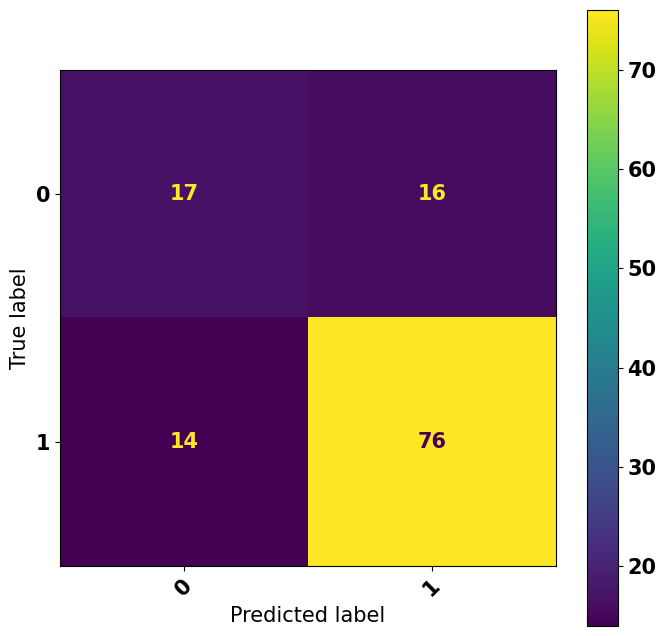

In [96]:
#Confusion Metrix
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

cm = confusion_matrix(ytest, y_predRF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

In [97]:
#Estimating Number of Estimator
errors = []

for i in range(1,50):
    rfc = RandomForestClassifier( n_estimators = i, bootstrap=True, max_features = 5)

    rfc.fit(xtrain,ytrain)
    preds = rfc.predict(xtest)
    err = 1 - accuracy_score(preds,ytest)
    n_missed = np.sum(preds != ytest)
    errors.append(err)

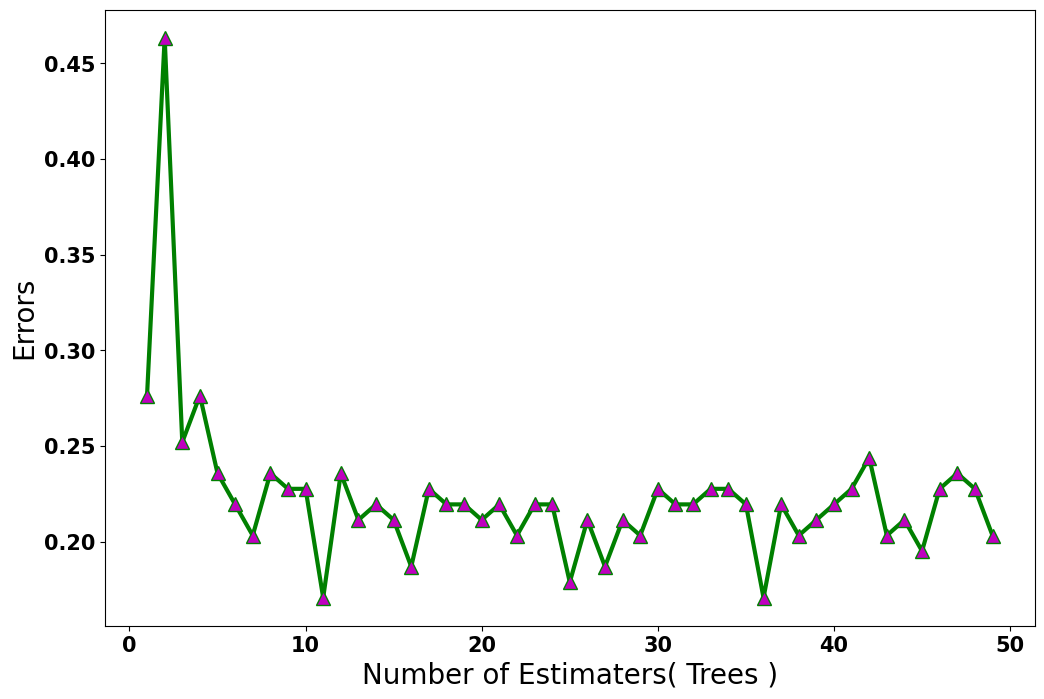

In [99]:
plt.figure(figsize = (12,8))
plt.plot(range(1,50),errors, 'g', lw = 3, marker = "^", markersize = 10, markerfacecolor = 'm')
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()

In [100]:
rf11 = RandomForestClassifier(n_estimators=11,max_features='sqrt', bootstrap = True, oob_score = True, random_state=101)
rf11.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=11, oob_score=True, random_state=101)

In [91]:
y_pred_11= rf11.predict(xtest)
Accuracy = np.mean(y_pred_11 == ytest) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 77.24


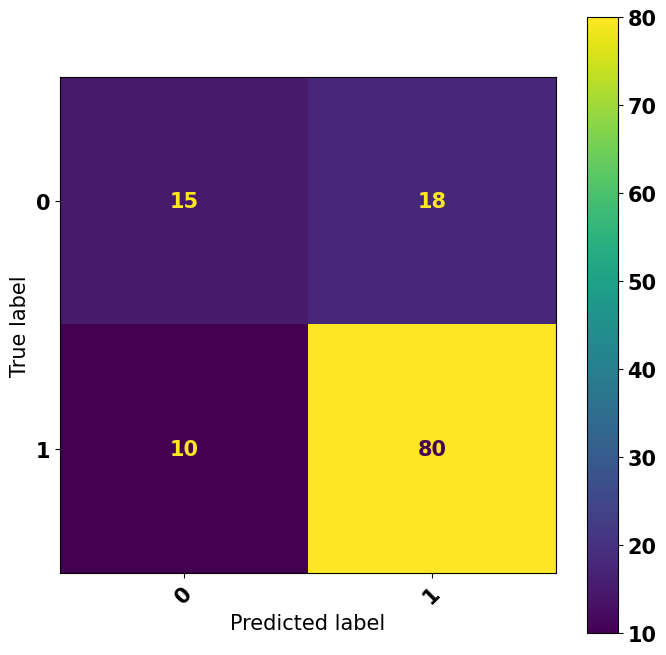

In [93]:
#Confusion Metrix
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

cm = confusion_matrix(ytest, y_pred_19)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

Decesion Tree

In [103]:
# Create an instance of the DecisionTreeClassifier
DT = DecisionTreeClassifier()

# Train the decision tree classifier using the scaled training data
DT.fit(xtrain, ytrain)

# Make predictions on the scaled test data
y_predD = DT.predict(xtest)

In [104]:
#Calculate accuracy
Accuracy = np.mean(y_predD == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 68.29


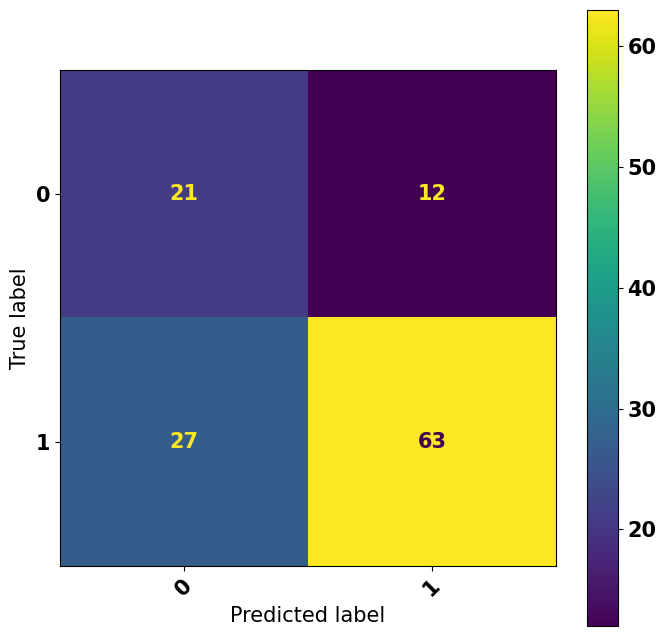

In [108]:
#Confusion Metrix
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)
cm = confusion_matrix(ytest, y_predD)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

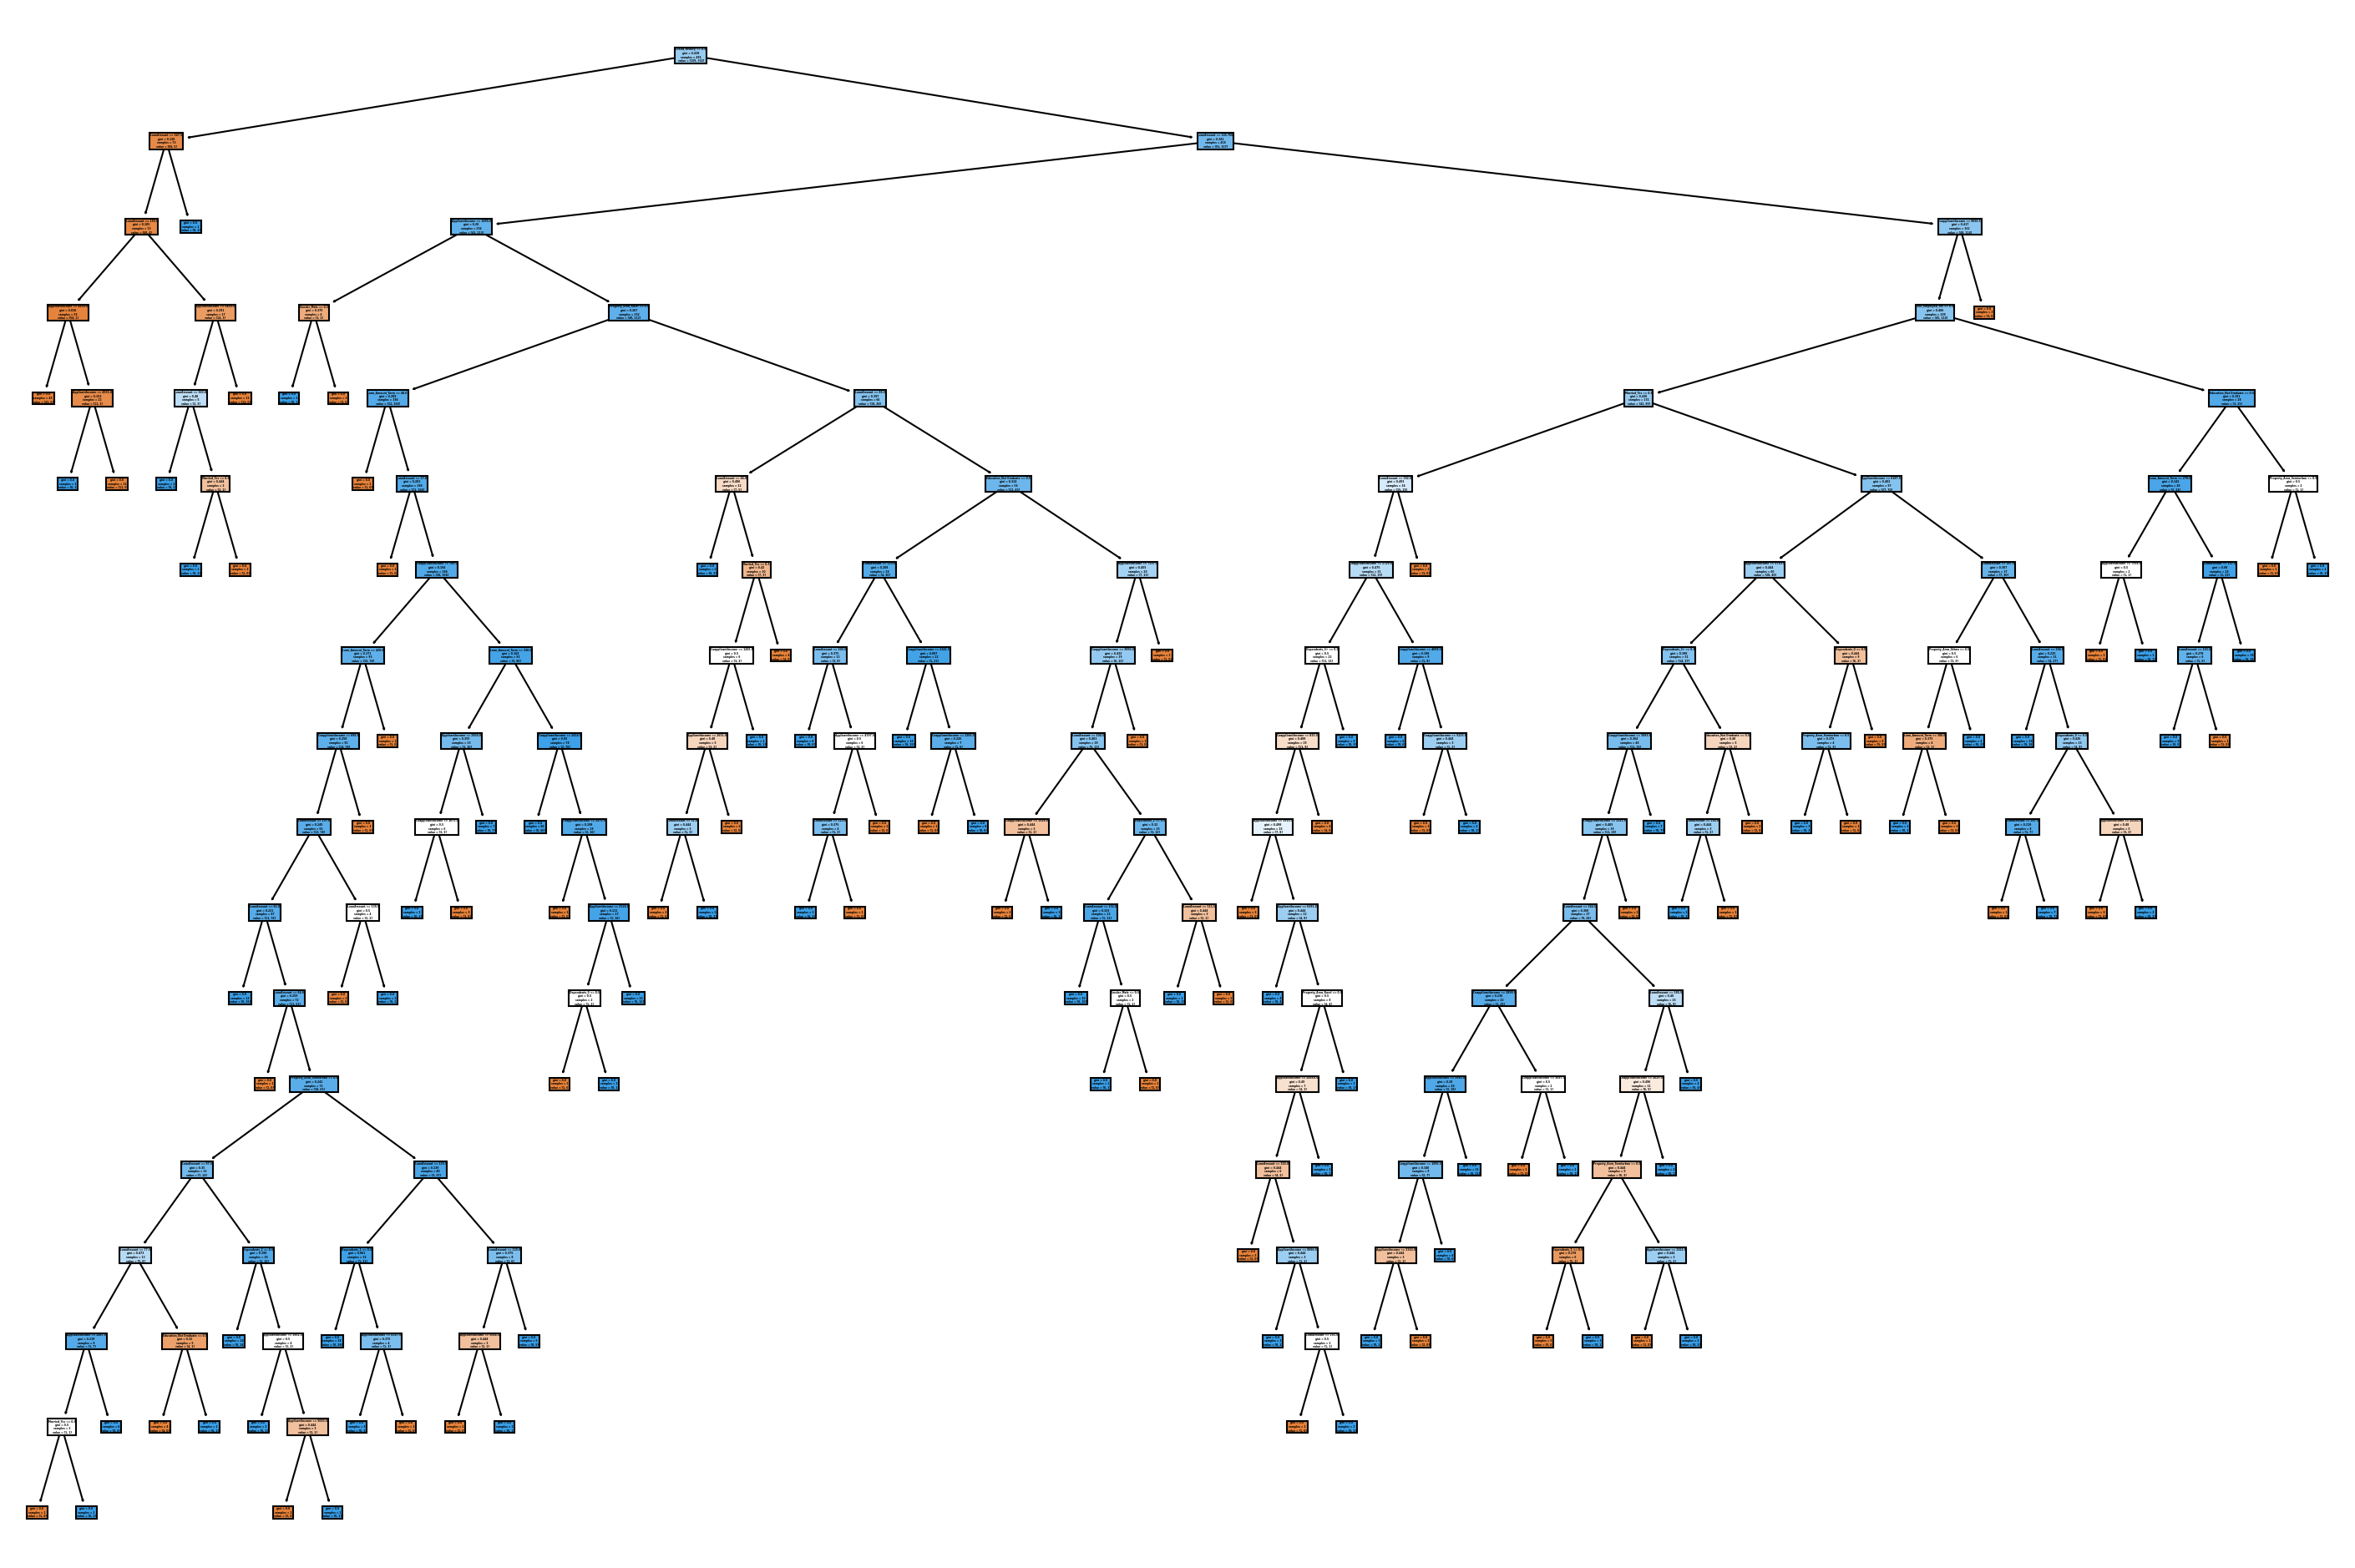

In [113]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,16),dpi=150)
plot_tree(DT, filled = True, feature_names = X.columns);

In [132]:
# Create an instance of the DecisionTreeClassifier
DT2 = DecisionTreeClassifier(max_depth=12)
DT2.fit(xtrain, ytrain)
y_predD2 = DT2.predict(xtest)

In [133]:
#Calculate accuracy
Accuracy = np.mean(y_predD2 == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 70.73


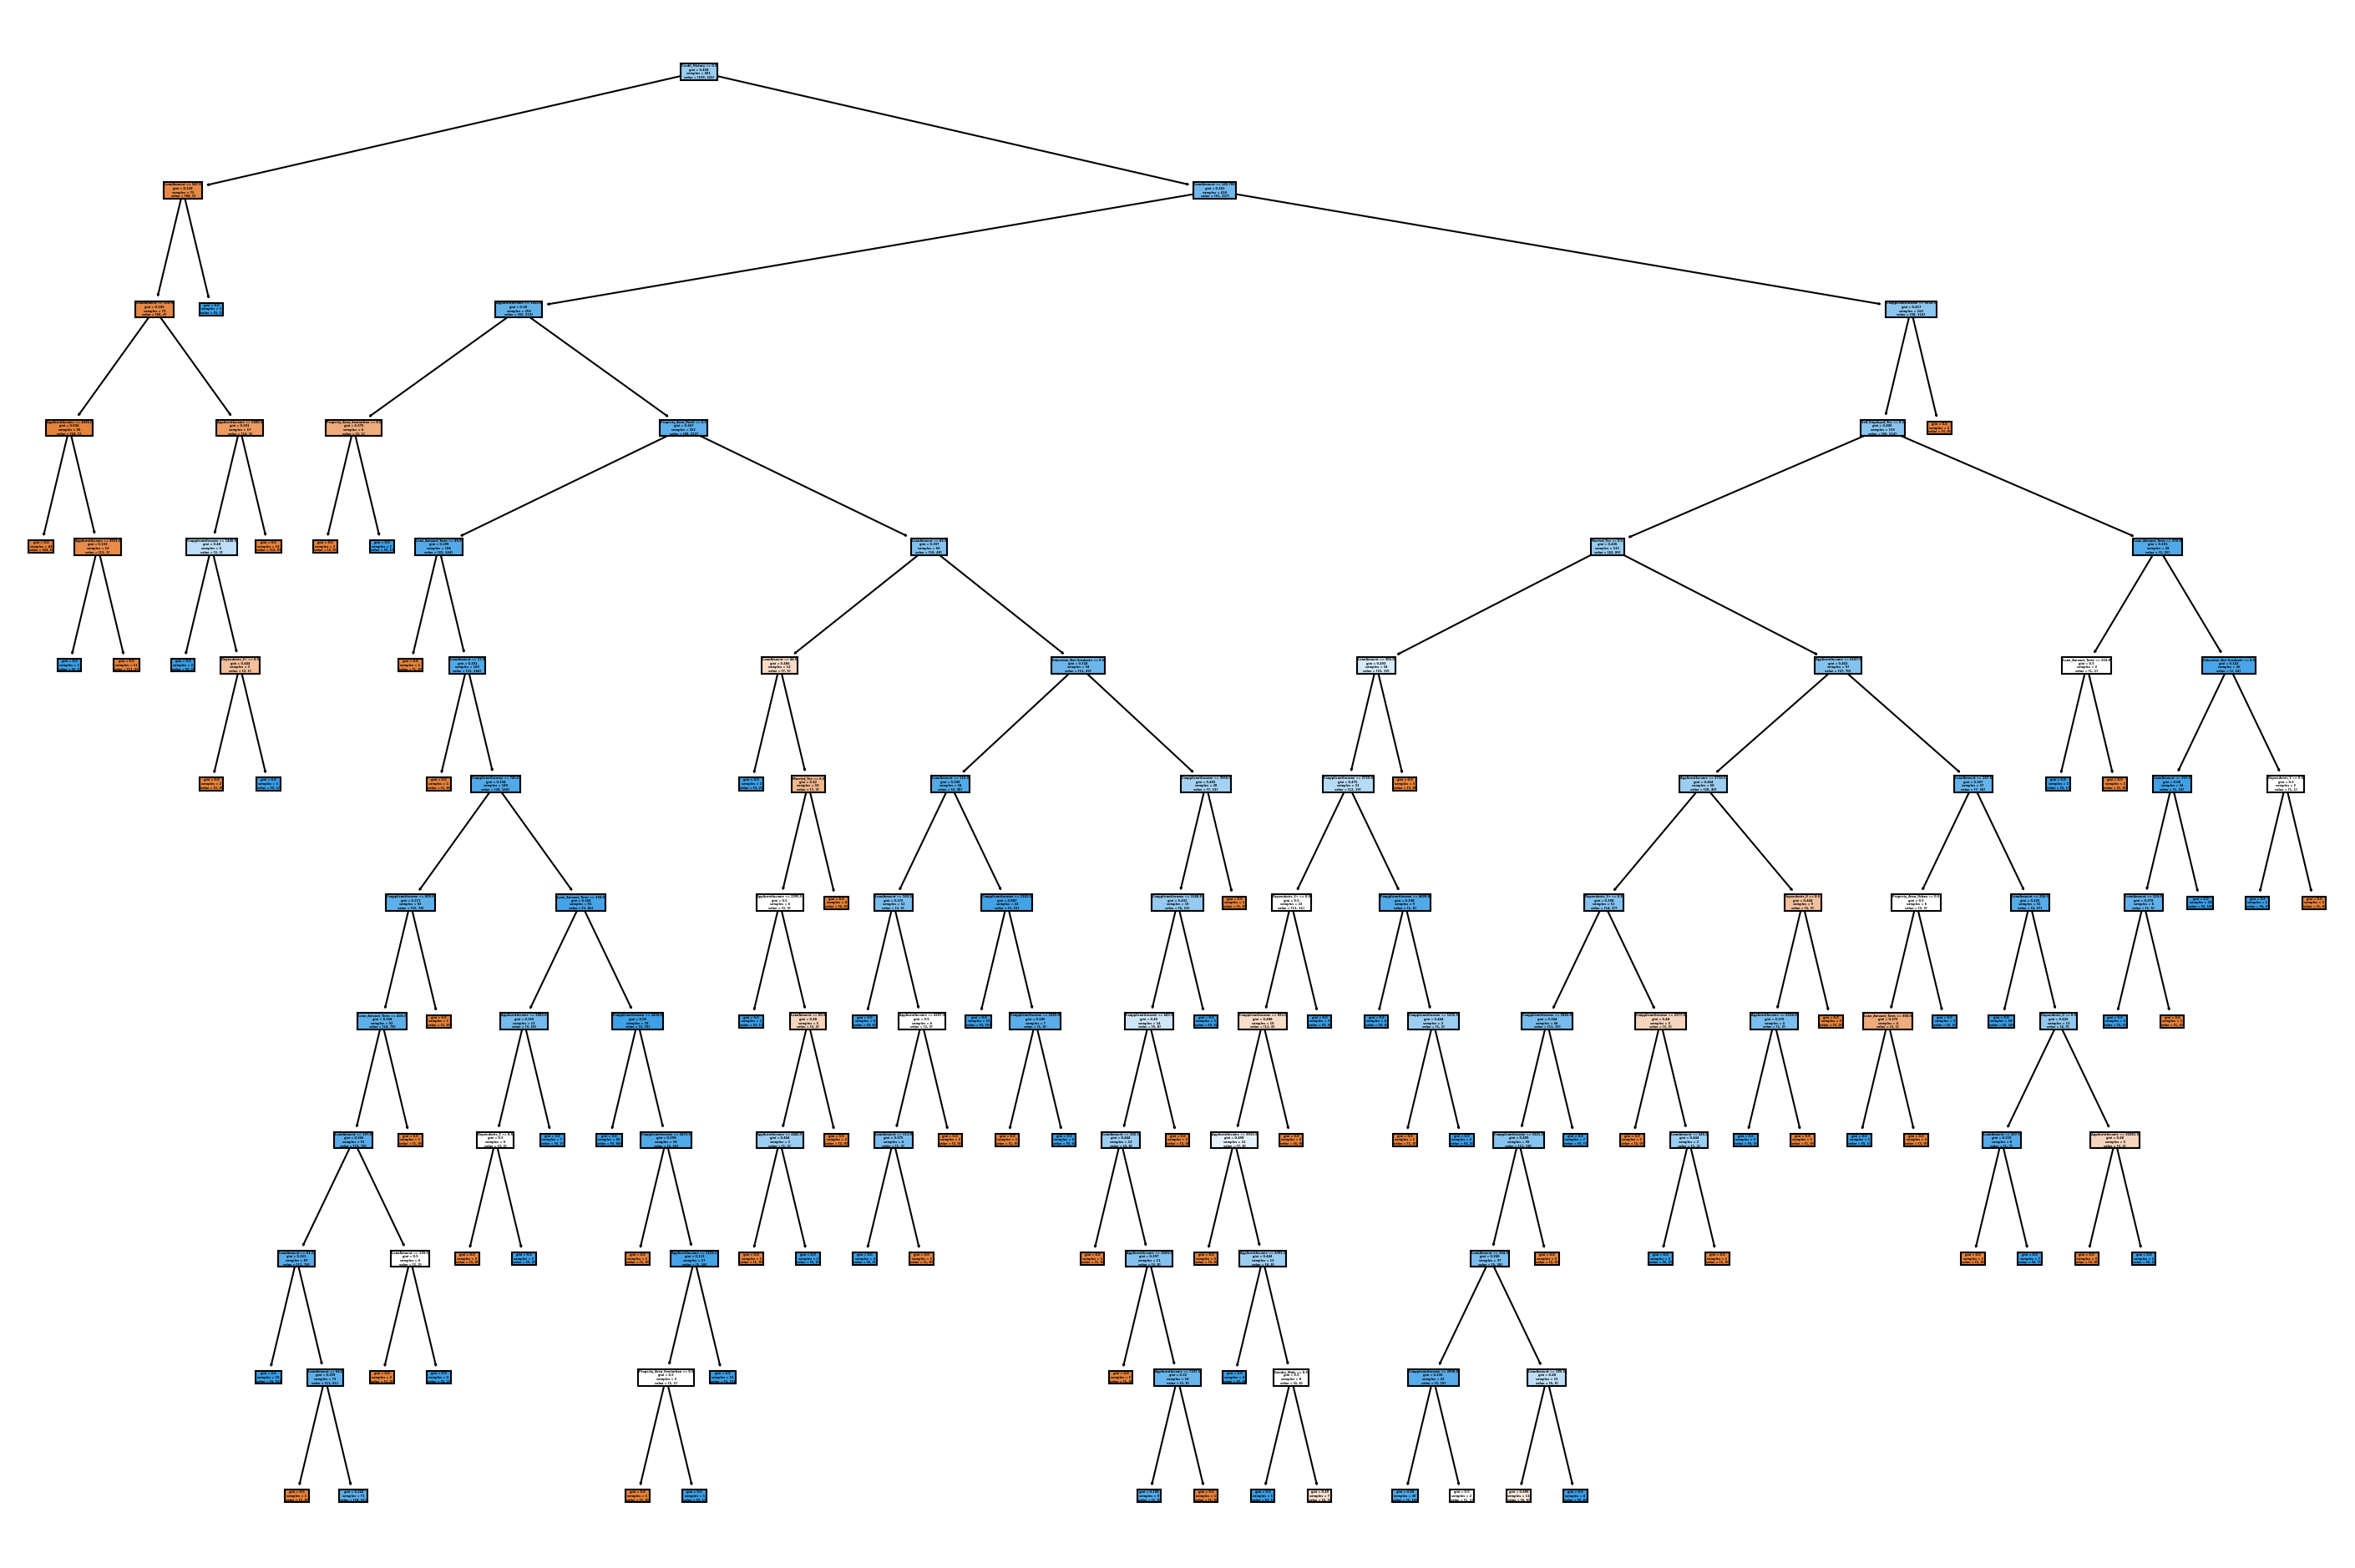

In [134]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,16),dpi=150)
plot_tree(DT2, filled = True, feature_names = X.columns);

In [135]:
# Generate a classification report
report = classification_report(ytest, y_predD2)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.47      0.61      0.53        33
           1       0.84      0.74      0.79        90

    accuracy                           0.71       123
   macro avg       0.65      0.68      0.66       123
weighted avg       0.74      0.71      0.72       123



Neural Network

In [140]:
# Create an instance of the neural network model
classifier =  MLPClassifier()

# Train the decision tree classifier using the scaled training data
classifier.fit(X_train_scaled, ytrain)

# Make predictions on the scaled test data
y_pred_MLP = classifier.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [141]:
#Calculate accuracy
Accuracy = np.mean(y_pred_MLP == ytest) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 81.30


All Algoridham Together

In [142]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
mlp = MLPClassifier()

model_list = [lr,knn,rf,dt]
train_acc = []
for i in model_list:
    i_model = i.fit(X_train_scaled,ytrain)
    y_pred = i_model.predict(X_test_scaled)
    train_acc.append(np.mean(y_pred == ytest)* 100)


In [143]:
model_names = [
    "   Logistic Regression",
    "                   KNN",
    "         Random Forest",
    "         Decision Tree",
    #"        Neural Network"
]

for acc, name in zip(train_acc, model_names):
    print(name + ": {:.4f}%".format(acc))

   Logistic Regression: 83.7398%
                   KNN: 74.7967%
         Random Forest: 78.8618%
         Decision Tree: 65.8537%
